In [1]:
df<-read.csv('d:/data/titanic/train3.csv')
head(df)

Survived,Pclass,pclass1,plclass2,plcass3,Sex,male,female,Age,SibSp,Parch,Fare
0,3,0,0,1,male,1,0,22,1,0,7.2500
1,1,1,0,0,female,0,1,38,1,0,71.2833
1,3,0,0,1,female,0,1,26,0,0,7.9250
1,1,1,0,0,female,0,1,35,1,0,53.1000
0,3,0,0,1,male,1,0,35,0,0,8.0500
0,3,0,0,1,male,1,0,30,0,0,8.4583


In [2]:
library(dplyr)
df<- df %>% select(-Pclass,-Sex) #분석에 사용하지 않을 필드 제외
dim(df) #데이터의 차원
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 891  10

Survived,pclass1,plclass2,plcass3,male,female,Age,SibSp,Parch,Fare
0,0,0,1,1,0,22,1,0,7.2500
1,1,0,0,0,1,38,1,0,71.2833
1,0,0,1,0,1,26,0,0,7.9250
1,1,0,0,0,1,35,1,0,53.1000
0,0,0,1,1,0,35,0,0,8.0500
0,0,0,1,1,0,30,0,0,8.4583



  0   1 
549 342 

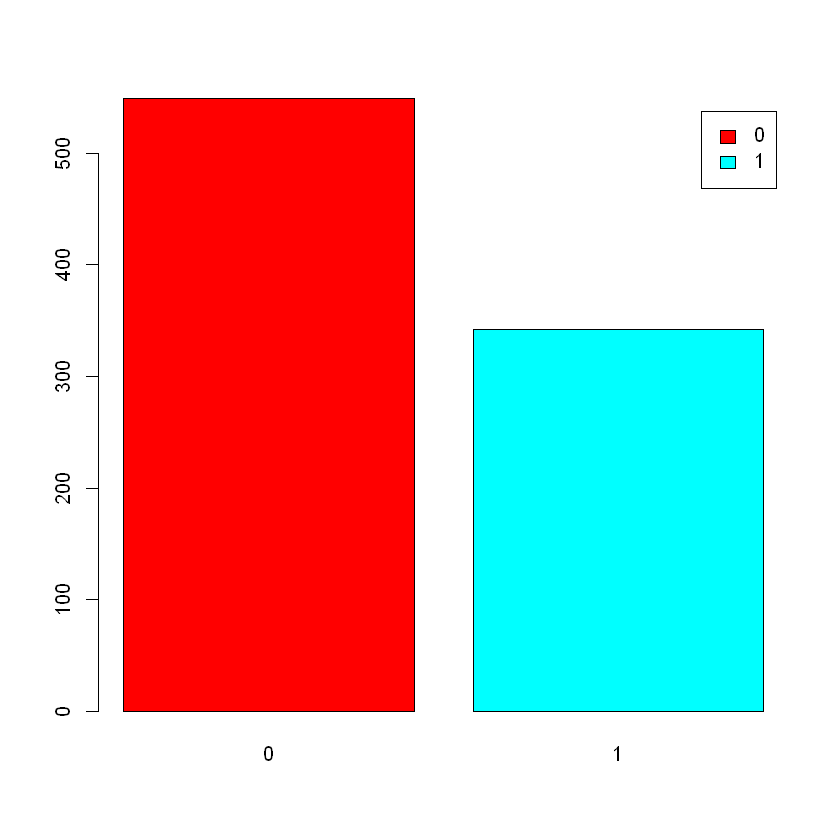

In [3]:
(tbl<-table(df$Survived))
barplot(tbl, beside=T, legend=T, col=rainbow(2))

In [4]:
library(ROSE)
df_samp <- ovun.sample(Survived~ . , data=df, seed=1, method='under',
                      N=342*2)$data
(tbl<-table(df_samp$Survived))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




  0   1 
342 342 

In [5]:
library(caret)
idx_train<-createDataPartition(y=df_samp$Survived,p=0.8,list=F)
train<-df_samp[idx_train,]
X_train<-train[,-1]
y_train<-train[,1]
test<-df_samp[-idx_train,]
X_test<-test[,-1]
y_test<-test[,1]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [7]:
#로지스틱 회귀분석 모형
model<-glm(Survived ~ . , data=train, family=binomial)
summary(model)


Call:
glm(formula = Survived ~ ., family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.82530  -0.70024   0.00139   0.67915   2.14762  

Coefficients: (2 not defined because of singularities)
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.185686   0.364604   5.995 2.04e-09 ***
pclass1      1.725605   0.338099   5.104 3.33e-07 ***
plclass2     0.984541   0.282899   3.480 0.000501 ***
plcass3            NA         NA      NA       NA    
male        -2.613776   0.242053 -10.798  < 2e-16 ***
female             NA         NA      NA       NA    
Age         -0.040175   0.009343  -4.300 1.71e-05 ***
SibSp       -0.330877   0.126971  -2.606 0.009163 ** 
Parch       -0.091209   0.141399  -0.645 0.518897    
Fare         0.004321   0.003248   1.330 0.183431    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 759.69  on 54

In [8]:
#후진제거법
reduced<-step(model,direction='backward')

Start:  AIC=535.32
Survived ~ pclass1 + plclass2 + plcass3 + male + female + Age + 
    SibSp + Parch + Fare


Step:  AIC=535.32
Survived ~ pclass1 + plclass2 + plcass3 + male + Age + SibSp + 
    Parch + Fare


Step:  AIC=535.32
Survived ~ pclass1 + plclass2 + male + Age + SibSp + Parch + 
    Fare

           Df Deviance    AIC
- Parch     1   519.74 533.74
<none>          519.32 535.32
- Fare      1   521.55 535.55
- SibSp     1   527.32 541.32
- plclass2  1   531.65 545.65
- Age       1   539.33 553.33
- pclass1   1   544.39 558.39
- male      1   666.65 680.65

Step:  AIC=533.74
Survived ~ pclass1 + plclass2 + male + Age + SibSp + Fare

           Df Deviance    AIC
- Fare      1   521.64 533.64
<none>          519.74 533.74
- SibSp     1   529.81 541.81
- plclass2  1   532.24 544.24
- Age       1   539.40 551.40
- pclass1   1   546.90 558.90
- male      1   667.97 679.97

Step:  AIC=533.64
Survived ~ pclass1 + plclass2 + male + Age + SibSp

           Df Deviance    AIC
<none>   

In [9]:
library(e1071)
#최적의 파라미터를 도출하는 과정
set.seed(123)
tune.out <- tune(svm, Survived ~pclass1 + plclass2 + male + Age + SibSp,
                data=train, range=list(cost=c(0.001,0.01,0.1,1,10),
                                      gamma=c(0.0001,0.001,0.01,0.1)))
summary(tune.out)
#최적 파라미터 cost 1, gamma 0.001

Warning message:
"package 'e1071' was built under R version 3.6.2"


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1 0.001

- best performance: 0.1692742 

- Detailed performance results:
    cost gamma     error dispersion
1  1e-03 1e-04 0.4950942 0.04066829
2  1e-02 1e-04 0.4945208 0.04067938
3  1e-01 1e-04 0.4888230 0.04078943
4  1e+00 1e-04 0.4345106 0.04181350
5  1e+01 1e-04 0.1693955 0.04347333
6  1e-03 1e-03 0.4945309 0.04067632
7  1e-02 1e-03 0.4889005 0.04075017
8  1e-01 1e-03 0.4353609 0.04150292
9  1e+00 1e-03 0.1692742 0.04330724
10 1e+01 1e-03 0.2134257 0.07371674
11 1e-03 1e-02 0.4895777 0.04062319
12 1e-02 1e-02 0.4414109 0.04040524
13 1e-01 1e-02 0.1741354 0.04308422
14 1e+00 1e-02 0.2069427 0.07263308
15 1e+01 1e-02 0.2037635 0.07281455
16 1e-03 1e-01 0.4663509 0.03989557
17 1e-02 1e-01 0.2672997 0.03608783
18 1e-01 1e-01 0.1842341 0.06532965
19 1e+00 1e-01 0.1910069 0.06665861
20 1e+01 1e-01 0.1923379 0.05961780


In [10]:
#최적의 svn 모형
bestmodel<-tune.out$best.model
summary(bestmodel)


Call:
best.tune(method = svm, train.x = Survived ~ pclass1 + plclass2 + 
    male + Age + SibSp, data = train, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 10), gamma = c(1e-04, 0.001, 0.01, 0.1)))


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.001 
    epsilon:  0.1 


Number of Support Vectors:  534






In [11]:
#학습용 데이터셋으로 모형의 성능 확인
pred<-predict(bestmodel,X_train)
result<-round(pred)
table(y_train,result)
mean(y_train==result)

       result
y_train   0   1
      0 233  41
      1  88 186

[1] 0.7645985

In [12]:
#검증용 데이터셋으로 모형의 성능 확인
pred<-predict(bestmodel,X_test)
result<-round(pred)
table(y_test,result)
mean(y_test==result)

      result
y_test  0  1
     0 63  5
     1 21 47

[1] 0.8088235